In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
def kmeans(X, K, max_iterations=5000, tol=1e-4):
    centroids_indices = np.random.choice(range(len(X)), K, replace=False)
    centroids = X.iloc[centroids_indices]

    for iteration in range(max_iterations):
        distances = np.linalg.norm(X.values[:, np.newaxis] - centroids.values, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X.iloc[labels == k].mean(axis=0) for k in range(K)])

#         if np.linalg.norm(new_centroids - centroids.values) < tol:
#             break

        centroids = pd.DataFrame(new_centroids, columns=X.columns)

    return labels, centroids

In [6]:
df = pd.read_csv("C:/Users/5th-NLP-Batch2/Downloads/Social_Network_Ads.csv")
df = df.drop(['Purchased', 'User ID', 'Gender'], axis=1)

In [11]:
K = 3
labels, centroids = kmeans(df, K)

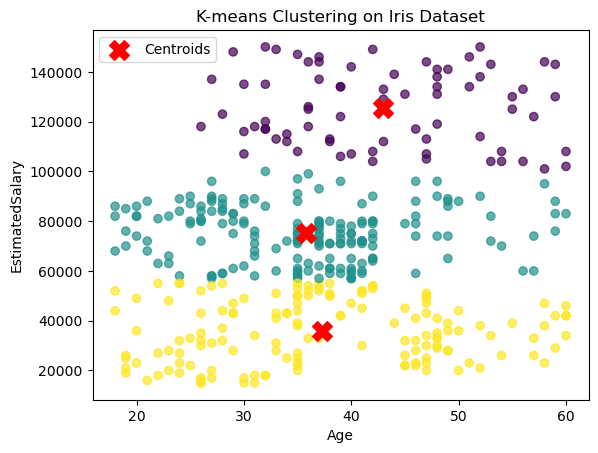

In [12]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centroids['Age'], centroids['EstimatedSalary'], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()